# Load files and libraries

In [168]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [169]:
df = pd.read_csv("fct_invoice.csv")

print(df)

      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

In [73]:
json_df = pd.read_json('dim_customer.json')
json_df.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


# Easy Questions

### 1. How many unique customers are in the dataset?

In [ ]:
df['customer_id'].nunique()

5191

There are 5191 unique customers

### 2. What are the different categories of products available? How many unique categories are there?

In [140]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [141]:
df['category'].nunique()

8

There are 8 categories, namely: Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage','Toys', 'Technology', 'Souvenir'

### 3. Which payment method is the most popular? How many times was it used?

In [143]:
most_popular = df['payment_method'].value_counts().idxmax() #gets the index label ('Cash')
print(most_popular)

Cash


In [144]:
df['payment_method'].value_counts().loc[most_popular] #loc is used to access indexes 

44447

The most popular payment method was Cash. It was used 44447 times.

# Medium Questions

### 1. What are the three most popular categories, by total sales?

In [145]:
df['total_sales'] = df['price'] * df['quantity'] # makes a new column for sales
df.groupby('category')['total_sales'].sum().nlargest(3) # .nlargest to get n rows in descending order

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

##### The three most popular categories by total sales are:
1. Clothing (1.139968e+08)
2. Shoes (6.655345e+07)
3. Technology (5.786235e+07)

### 2. What are the total sales attributed to customers over the age of 45?

In [149]:
join_df = pd.merge(left = df, right = json_df, left_on = "customer_id", right_on = "id")

join_df[join_df['age'] > 45].sum()['total_sales'] # sum up total sales column

82039768.15

The total sales attributed to customers over the age of 45 is 82039768.15.

### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

#### Monthly Sales of 2021 - 2023 (No. of Invoices)

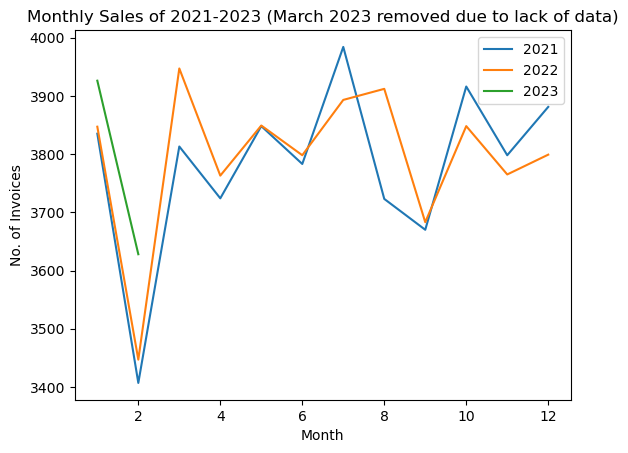

In [161]:
df['datetime'] = pd.to_datetime(df['invoice_date'], format = "%d/%m/%Y")
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

df.groupby(['year','month']).count()

for year in [2021, 2022, 2023]:
    temp_df = df[df['year'] == year].copy()
    y = temp_df.groupby('month').count()['total_sales']
    x = list(range(1,13))
    
    if year == 2023:
        y = y[0:2]
        x = x[0:2]
        
    plt.plot(x, y, label=str(year))
    plt.title("Monthly Sales of 2021-2023 (March 2023 removed due to lack of data)")
    plt.xlabel("Month")
    plt.ylabel("No. of Invoices")
    plt.legend()
    
plt.show()

February had the worst sales across 2021 - 2023. For 2021, sales hit its peak on July; on the other hand, sales hit its peak on March for 2022. Through the graph, it is noticeable that sales plummet during the start of the year and start picking up from February onwards. However, sales are not consistent as there are still some declines and increase throughout the year.

#### Monthly Sales of 2021 - 2023 (Total Sales)

/var/folders/k2/569grcyn0q976qz42827_mgc0000gn/T/ipykernel_1840/1707518263.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = temp_df.groupby('month').sum()['total_sales']
/var/folders/k2/569grcyn0q976qz42827_mgc0000gn/T/ipykernel_1840/1707518263.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = temp_df.groupby('month').sum()['total_sales']
/var/folders/k2/569grcyn0q976qz42827_mgc0000gn/T/ipykernel_1840/1707518263.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or selec

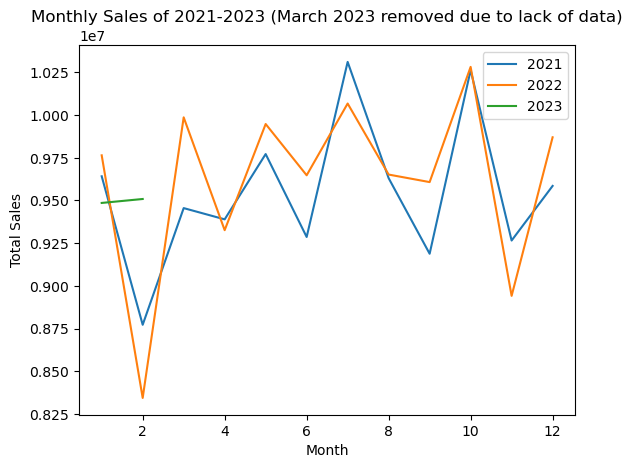

In [163]:
for year in [2021, 2022, 2023]:
    temp_df = df[df['year'] == year].copy()
    y = temp_df.groupby('month').sum()['total_sales']
    x = list(range(1,13))
    
    if year == 2023:
        y = y[0:2]
        x = x[0:2]
        
    plt.plot(x, y, label=str(year))
    plt.title("Monthly Sales of 2021-2023 (March 2023 removed due to lack of data)")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.legend()
    
plt.show()

For both 2021 and 2022, total sales were the least during February. During 2021, sales were the highest at July while sales hit its peak at October during 2022. From the data, it shows that the highest amount of total sales are during July to October. On the other hand. total sales are the least at the start of the year, especially during January and February. Since 2023 is lacking data, it's difficult to conclude any insights aside from it having consistent and better results than January and February of the previous years.

# Hard

### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

#### Number of Sales

In [165]:
import pandas as pd

new_df = join_df[['total_sales', 'category', 'age']].copy()
new_df = new_df.dropna() # removes the rows that contains NULL values.

new_df['decade_range'] = new_df['age'].apply(lambda x: f"{int(x // 10 * 10)}-{int(x // 10 * 10 + 9)}" if x is not None else x)
table = pd.pivot_table(new_df, values='total_sales', index='category', columns='decade_range', aggfunc=len, fill_value=0)

# aggfunc = len counts the number of occurrences for each combination of 'category' and 'decade_range'

table

decade_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,75,475,507,510,462,466,351,174
Clothing,563,3168,3389,3407,3085,3250,2349,1361
Cosmetics,235,1355,1636,1487,1329,1441,942,596
Food & Beverage,225,1342,1506,1567,1301,1430,951,555
Shoes,153,902,1022,1033,875,884,676,380
Souvenir,90,453,498,495,426,445,304,188
Technology,85,458,528,524,388,501,309,178
Toys,166,924,1076,1000,870,942,677,412


#### Total Sales

In [166]:
new_df = join_df[['total_sales', 'category', 'age']].copy()
new_df = new_df.dropna() # removes the rows that contains NULL values.

new_df['decade_range'] = new_df['age'].apply(lambda x: f"{int(x // 10 * 10)}-{int(x // 10 * 10 + 9)}" if x is not None else x)
table = pd.pivot_table(new_df, values='total_sales', index='category', columns='decade_range', aggfunc=np.sum, fill_value=0)

# aggfunc = len counts the number of occurrences for each combination of 'category' and 'decade_range'

table

decade_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
